In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"tarundalal","key":"e6884e049086728c30cd54477f8ffce3"}'}

In [2]:
!ls -lha kaggle.json

!pip install -q Kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets list -s image

-rw-r--r-- 1 root root 66 Feb  9 17:14 kaggle.json
ref                                               title                                      size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------  ----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muratkokludataset/pistachio-image-dataset         Pistachio Image Dataset                    27MB  2022-03-28 18:01:27           2318       1545  0.9375           
muratkokludataset/rice-image-dataset              Rice Image Dataset                        219MB  2022-04-03 02:12:00           6933       1648  0.875            
puneet6060/intel-image-classification             Intel Image Classification                346MB  2019-01-30 09:22:58          72094       1271  0.75             
vishalsubbiah/pokemon-images-and-types            Pokemon Image Dataset                       2MB  2018-12-17 01:01:39          2

In [3]:
!kaggle datasets download -d puneet6060/intel-image-classification

!unzip intel-image-classification.zip

intel-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  intel-image-classification.zip
replace seg_pred/seg_pred/10004.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
import os

In [5]:
os.listdir()

['.config',
 'intel-image-classification.zip',
 'kaggle (1).json',
 'seg_pred',
 'kaggle.json',
 'seg_train',
 'seg_test',
 'sample_data']

In [6]:
train = "seg_train/seg_train"
test = "seg_test/seg_test"

In [7]:
import tensorflow as tf
import os 
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
os.listdir(train)

['mountain', 'street', 'glacier', 'sea', 'buildings', 'forest']

In [9]:
os.listdir(test)


['mountain', 'street', 'glacier', 'sea', 'buildings', 'forest']

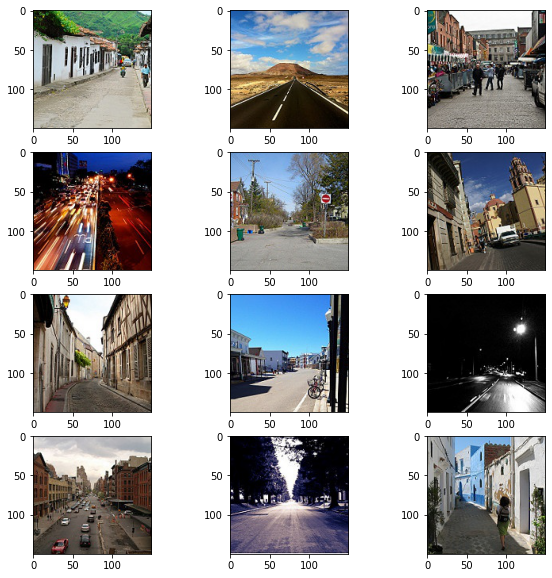

In [10]:
choice = 'street'
plt.figure(figsize=(10,10))
for i in range(12):
  plt.subplot(4,3,i+1)
  path = f"{train}/{choice}/"
  images = os.listdir(path)
  img = plt.imread(f"{path+images[i]}")
  plt.imshow(img)

In [11]:
train_aug = ImageDataGenerator(rescale = 1/255.0,
                               rotation_range=45,
                               zoom_range=0.2,
                               horizontal_flip = True 
)

In [12]:
test_aug = ImageDataGenerator(rescale = 1/255.0)

In [13]:
training_data = train_aug.flow_from_directory(train,
                                   batch_size=32,
                                   target_size=(224,224),
                                   shuffle=True,
                                   class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [14]:
for img,label in training_data:
  print(img.shape)
  print(label.shape)
  break

(32, 224, 224, 3)
(32, 6)


In [15]:
testing_data = test_aug.flow_from_directory(test,
                                   batch_size=32,
                                   target_size=(224,224),
                                   shuffle=True,
                                   class_mode='categorical')

Found 3000 images belonging to 6 classes.


In [16]:
image,label = testing_data[0]

In [17]:
image.shape

(32, 224, 224, 3)

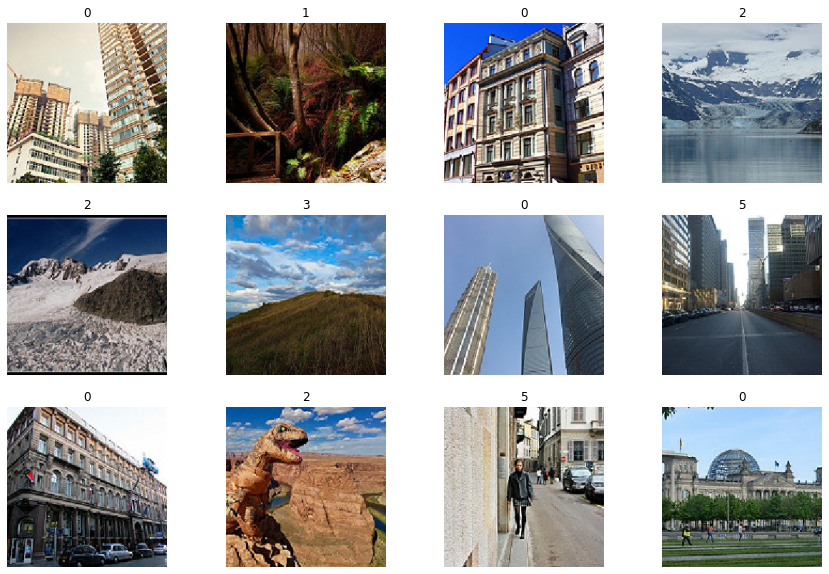

In [18]:
plt.figure(figsize=(15,10))
n = 12
for i in range(n):
    plt.subplot(3,4,i+1)
    validImages,validLabels = testing_data[i+(i*3)]
    plt.imshow(validImages[0])
    decodeLabel = np.argmax(validLabels)
    plt.title(decodeLabel)
    plt.axis("off")

In [20]:
data_augmentation = keras.Sequential([
  keras.layers.RandomFlip("horizontal_and_vertical"),
  keras.layers.RandomRotation(0.2),
])

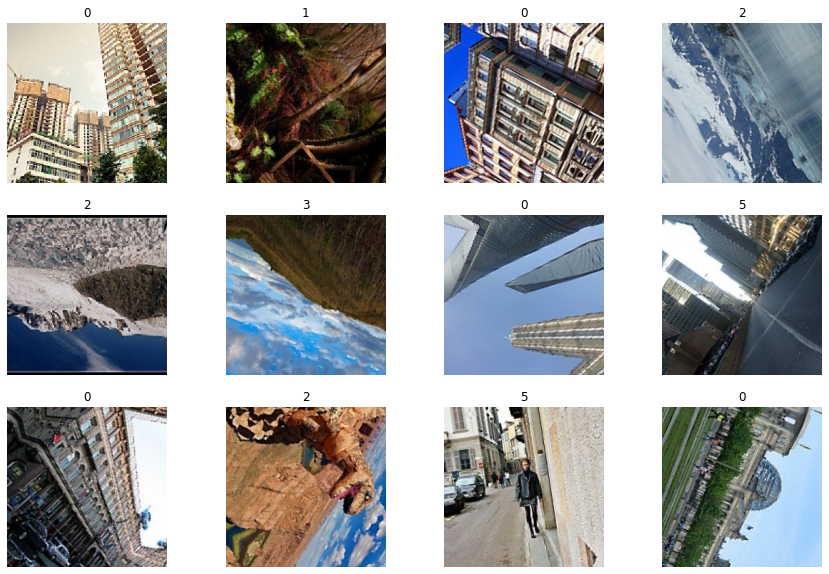

In [22]:
plt.figure(figsize=(15,10))
n = 12
for i in range(n):
    plt.subplot(3,4,i+1)
    validImages,validLabels = testing_data[i+(i*3)]
    aug_image = data_augmentation(validImages[0])
    plt.imshow(aug_image)
    decodeLabel = np.argmax(validLabels)
    plt.title(decodeLabel)
    plt.axis("off")

In [23]:
model = keras.models.Sequential()
#model.add(data_augmentation)
model.add(keras.layers.Conv2D(32,3,input_shape=(224,224,3)))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(64,3,activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(6,activation="softmax"))

In [24]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['acc'])

In [25]:
history = model.fit(training_data,validation_data=testing_data,epochs=3,steps_per_epoch=100)

Epoch 1/3


100/100 [==============================] - ETA: 0s - loss: 3.6843 - acc: 0.3847

100/100 [==============================] - 54s 509ms/step - loss: 3.6843 - acc: 0.3847 - val_loss: 1.7551 - val_acc: 0.1690
Epoch 2/3
100/100 [==============================] - 49s 490ms/step - loss: 1.3151 - acc: 0.4909 - val_loss: 1.5867 - val_acc: 0.4203
Epoch 3/3
100/100 [==============================] - 48s 482ms/step - loss: 1.2977 - acc: 0.4937 - val_loss: 1.4732 - val_acc: 0.4447


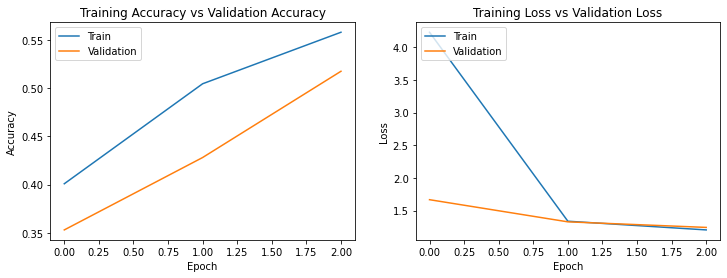

In [40]:
fig , ax = plt.subplots(1,2)  img = load_img(image_file,target_size = (224,224,3))
    x = img_to_array(img)
    x = np.expand_dims(x,axis=0)

    target = model.predict(x)
    target = np.argmax(target)
fig.set_size_inches(12,4)

ax[0].plot(history.history['acc'])
ax[0].plot(history.history['val_acc'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

In [26]:
from tensorflow.keras.preprocessing.image import img_to_array,load_img
from tensorflow.keras.models import load_model

In [51]:
testing_image = 'seg_test/seg_test/buildings/'
random_image = os.listdir(testing_image)[7]

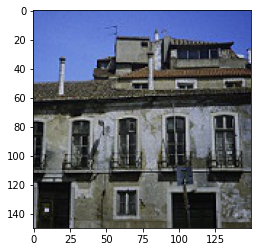

In [52]:
view = plt.imread(f"{testing_image+random_image}")
plt.imshow(view)

In [53]:
img = load_img(f"{testing_image+random_image}",target_size = (224,224,3))

In [54]:
x = img_to_array(img)

In [55]:
x.shape

(224, 224, 3)

In [56]:
x = np.expand_dims(x,axis=0)

In [57]:
x.shape

(1, 224, 224, 3)

In [58]:
target = model.predict(x)
target = np.argmax(target)

1/1 [==============================] - 0s 21ms/step


In [59]:
target

0

In [60]:
class_names = ['buildings','forest','glacier','sea','street','mountain']
class_names.sort()

In [61]:
class_names[target]

'buildings'